 # Importing Libraries

In [76]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [77]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import datetime
from scipy.stats import pearsonr

In [78]:
# Read the data from csv file

df = pd.read_csv('/Users/i311077/Downloads/day.csv')

In [79]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [80]:
# checking the shape of dataframe

df.shape

(730, 16)

In [81]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [82]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [83]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Preparation

In [84]:
# renaming few columns for better readibility

df.rename(columns={'dteday':'date','yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [85]:
# Check the head of the dataset

df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [86]:
# dropping the unwanted columns
# instant has only index for the row,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','casual','registered'],axis=1,inplace=True)

In [87]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [88]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [89]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [90]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [91]:
# check the head of the dataset

df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Define few methods which can be used multiple times .

In [92]:
# function to create barplot related to categorical columns

def bar_graph(column):
    plt.figure(figsize = (24,6))

    sns.barplot(column,'cnt',data=df)
  
    plt.show()

In [93]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [94]:
df.date.describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: date, dtype: object

In [95]:
df['date'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: date, dtype: float64

In [96]:
#extract day from date field
df['day'] = df['date'].apply(lambda x: int(x.split('-')[0]))

In [97]:
df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,15.720548
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,8.802278
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,1.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,8.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,16.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,23.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,31.000000


As we can observe humidity column has minimum value is zero. It is impossible column has zero value. so we can repalce 
value of zero with mean value of humidity


Text(0.5, 0, 'Humidity')

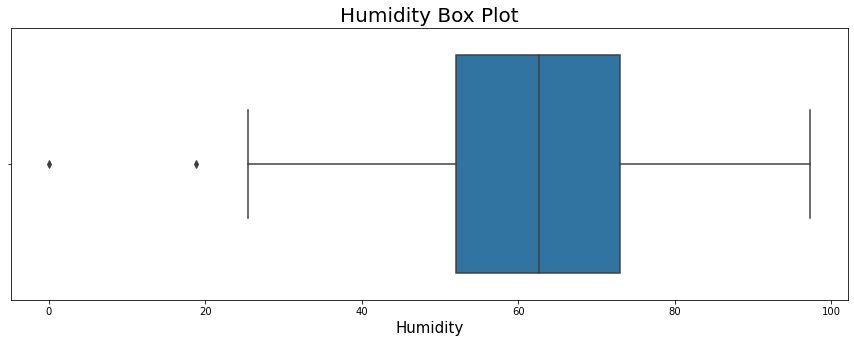

In [98]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='humidity')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [99]:
mean_value = df.humidity.mean()
mean_value

62.76517493150686

In [100]:
df.at[int(df[df['humidity'] == 0.0].humidity.index.values), "humidity"] = mean_value

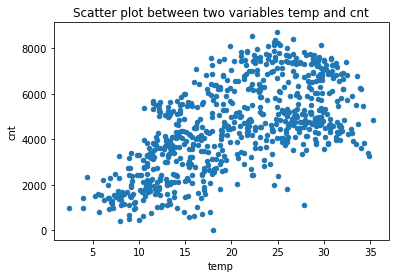

In [101]:
df.plot.scatter(x='temp', y='cnt', title= "Scatter plot between two variables temp and cnt");

plt.show(block=True);

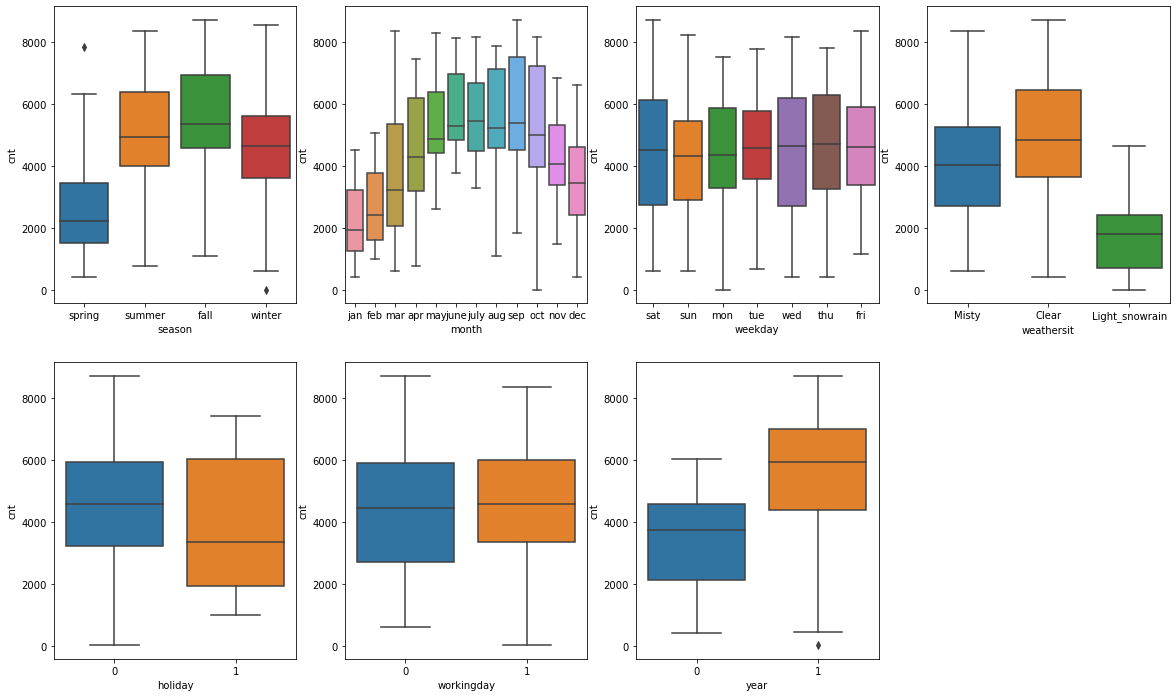

In [102]:
# Analysing/visualizing the  columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [103]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,day
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,2
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


# Visualize data using bar chart

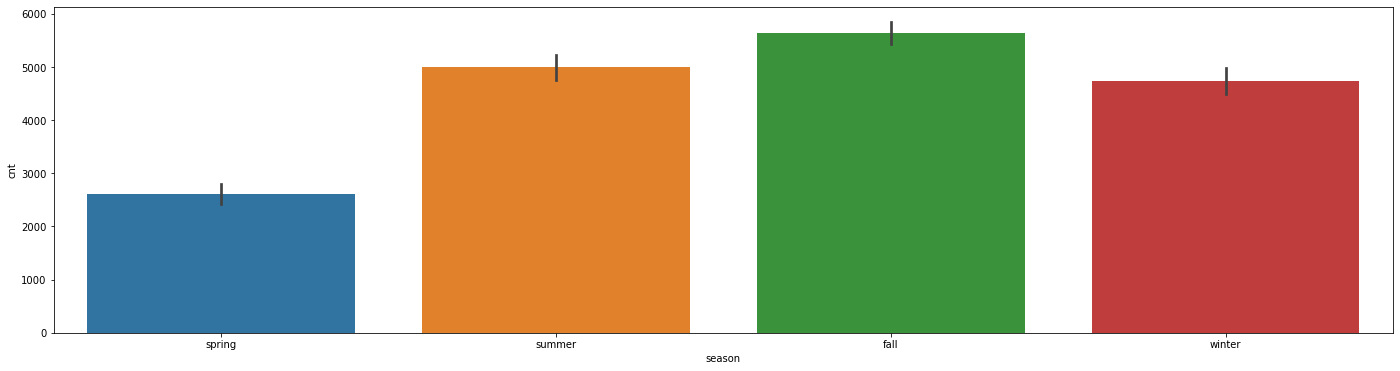

In [104]:
# plotting visualization for season column using bar graph

bar_graph('season')

distribution is quite different for respective seasons.

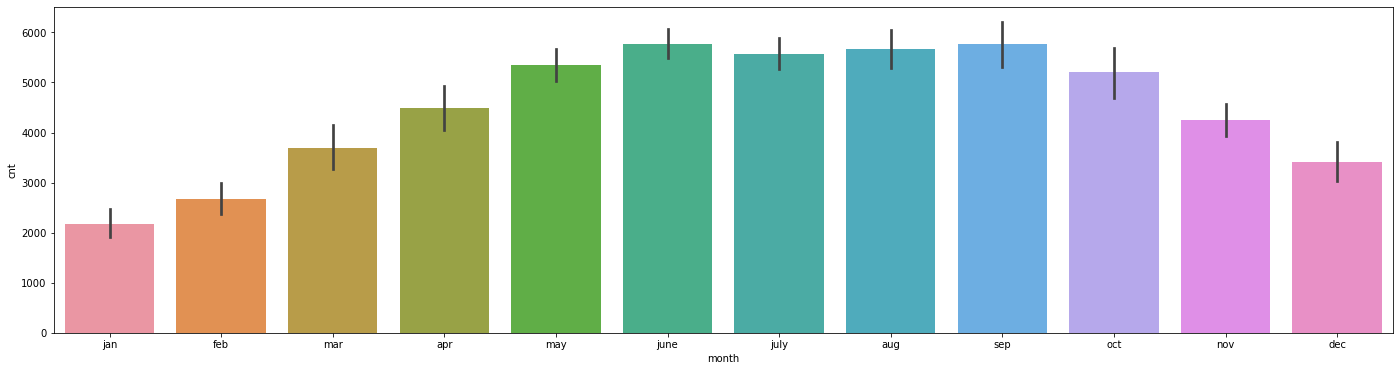

In [105]:
# plotting visualization for month column

bar_graph('month')

Most preferable ride during month of May-Oct. 

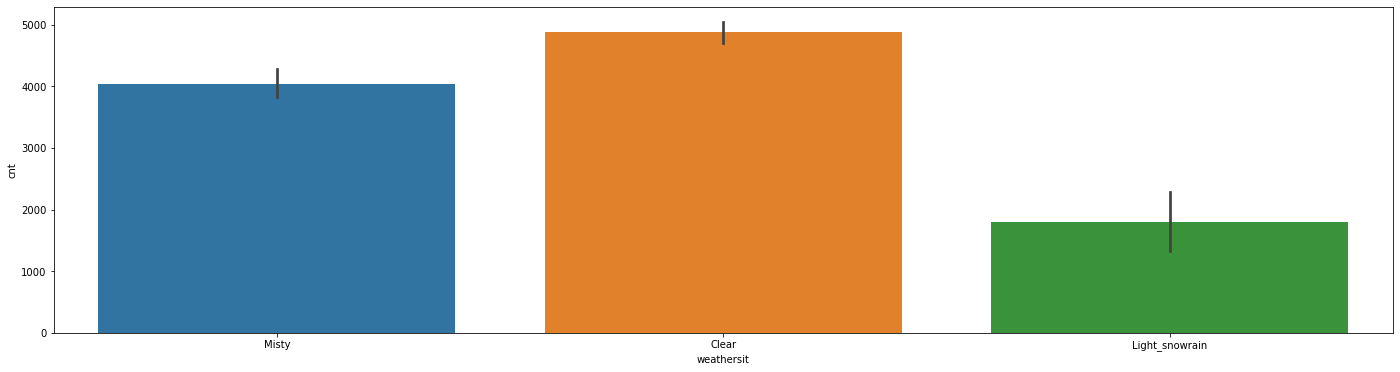

In [106]:
# plotting visualization for weathersit column

bar_graph('weathersit')

During clear weather, number of rides are more

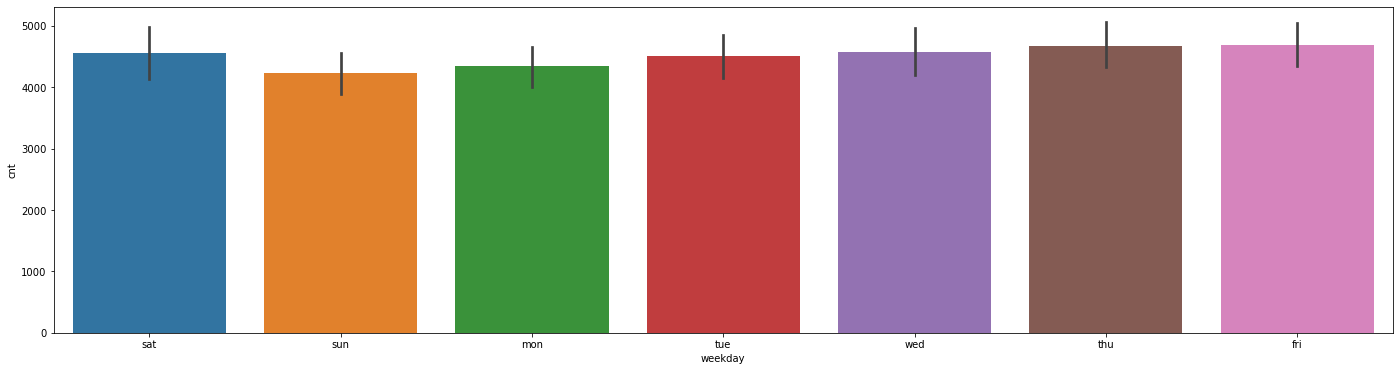

In [107]:
# plotting visualization for weekday column

bar_graph('weekday')
# no difference in weekday

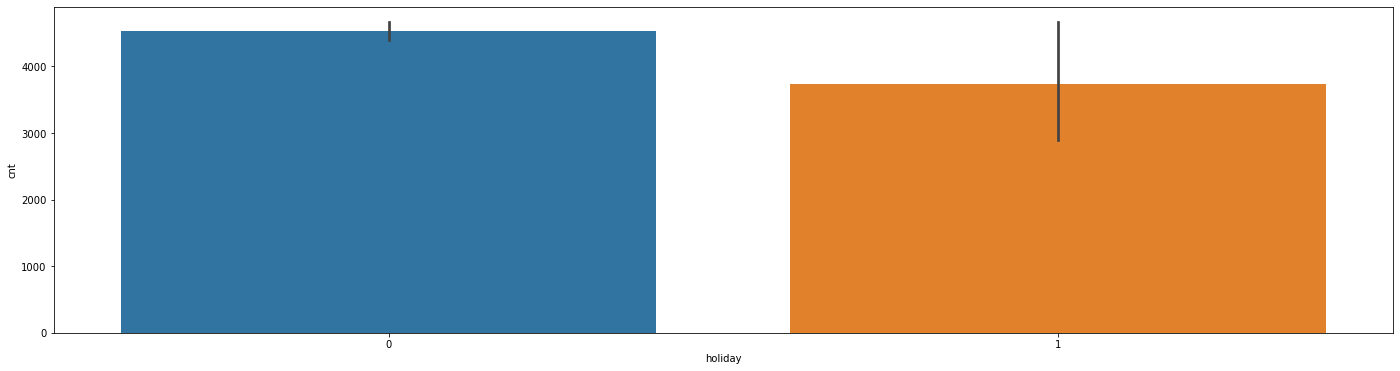

In [108]:
# plotting visualization for holiday column

bar_graph('holiday')

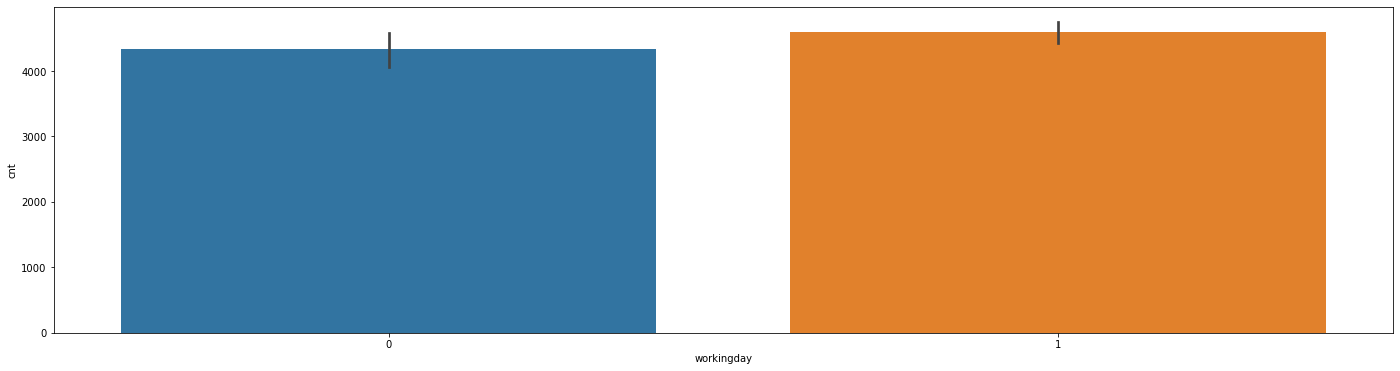

In [109]:
# plotting visualization for workingday column

bar_graph('workingday')

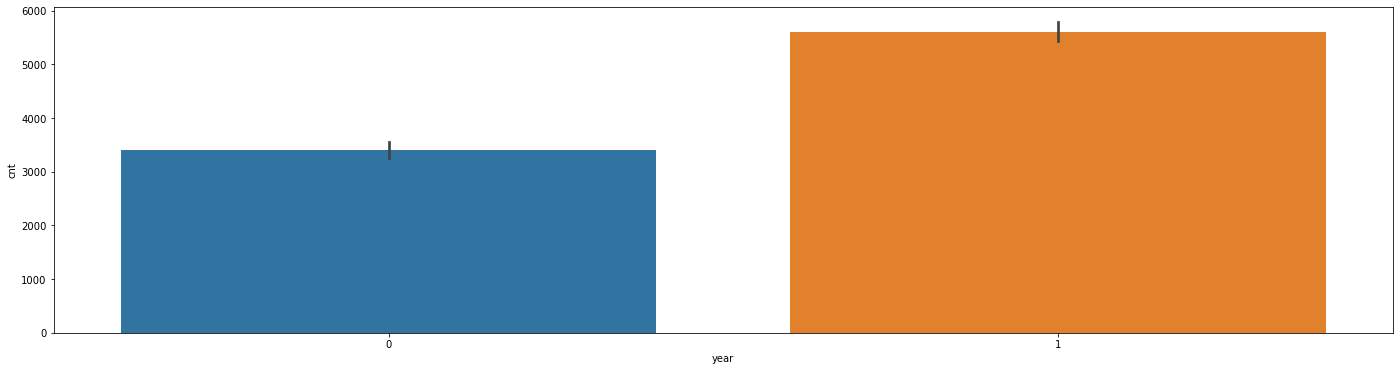

In [110]:
# plotting visualization for year column

bar_graph('year')
# there is increase in ride count in 2019

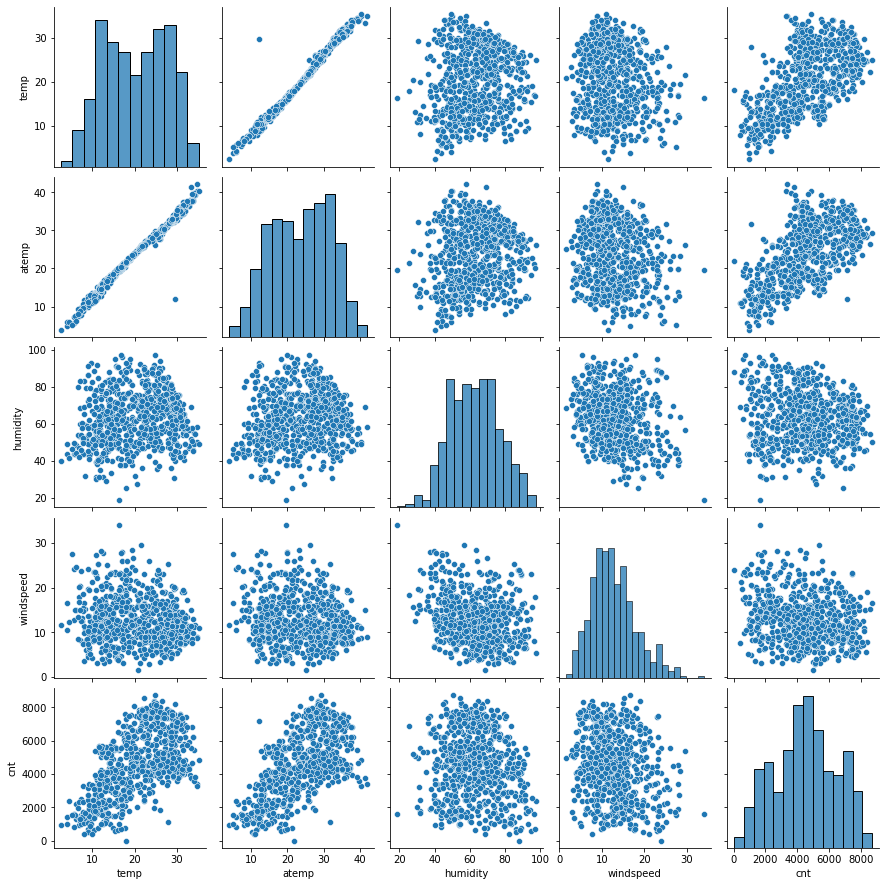

In [111]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

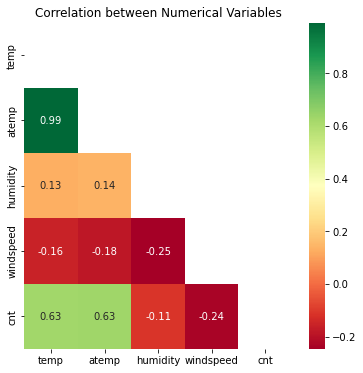

In [112]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [113]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [114]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,day
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,2
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [115]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [116]:
df_new.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,...,1,0,0,0,0,0,1,1,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,...,0,1,0,0,0,0,1,1,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,1,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,1,0,0,0,1,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,1,0,0,1,0,0


In [117]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            730 non-null    object 
 1   season          730 non-null    object 
 2   year            730 non-null    int64  
 3   month           730 non-null    object 
 4   holiday         730 non-null    int64  
 5   weekday         730 non-null    object 
 6   workingday      730 non-null    int64  
 7   weathersit      730 non-null    object 
 8   temp            730 non-null    float64
 9   atemp           730 non-null    float64
 10  humidity        730 non-null    float64
 11  windspeed       730 non-null    float64
 12  cnt             730 non-null    int64  
 13  day             730 non-null    int64  
 14  aug             730 non-null    uint8  
 15  dec             730 non-null    uint8  
 16  feb             730 non-null    uint8  
 17  jan             730 non-null    uin

In [118]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['date','season','month','weekday','weathersit'], axis = 1, inplace = True)

In [119]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,2,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,0,...,0,0,0,0,1,0,0,1,0,0


In [120]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   day             730 non-null    int64  
 9   aug             730 non-null    uint8  
 10  dec             730 non-null    uint8  
 11  feb             730 non-null    uint8  
 12  jan             730 non-null    uint8  
 13  july            730 non-null    uint8  
 14  june            730 non-null    uint8  
 15  mar             730 non-null    uint8  
 16  may             730 non-null    uint8  
 17  nov             730 non-null    uin

In [121]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [122]:
# check the shape of training datatset

df_train.shape

(510, 31)

In [123]:
# check the shape of testing datatset

df_test.shape

(220, 31)

In [124]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [125]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,31,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,3,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,30,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,28,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,22,0,...,0,0,0,0,0,0,1,0,1,0


In [126]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [127]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,31,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,3,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,30,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,28,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,22,0,...,0,0,0,0,0,0,1,0,1,0


In [128]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.568116,0.320883,0.513499,15.592157,0.096078,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.177295,0.169803,0.224421,8.911833,0.294988,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.428913,0.199179,0.356420,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.570553,0.296763,0.518638,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.695953,0.414447,0.684710,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


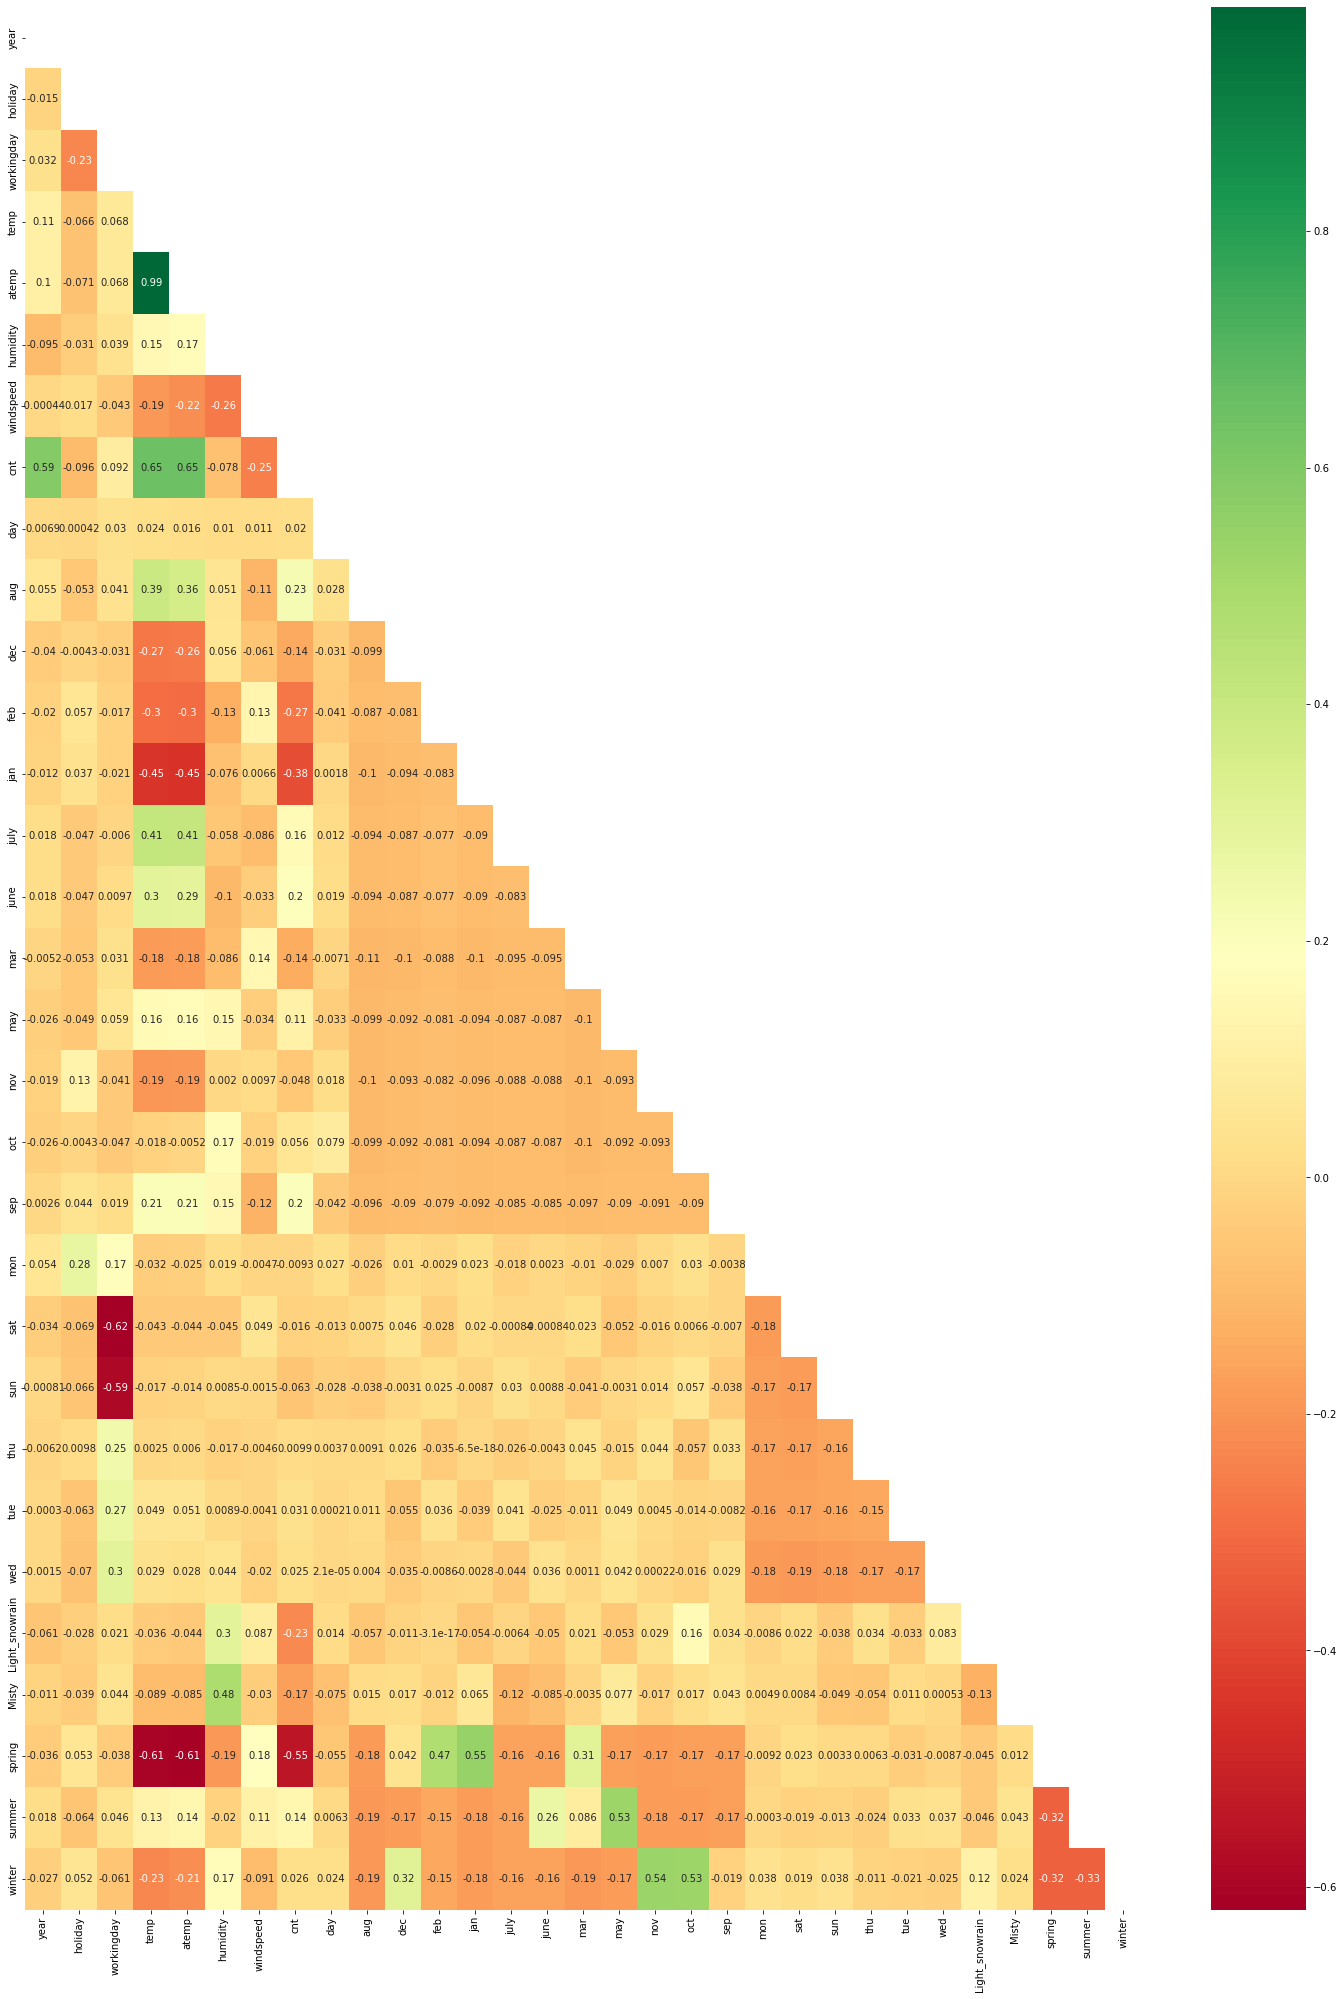

In [129]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,35))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

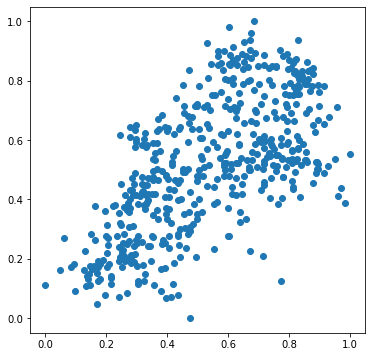

In [130]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [131]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [132]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [133]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, step = 15)
rfe = rfe.fit(X_train, y_train)

In [134]:
df_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,day,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.659744,0.264686,31,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,3,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.377528,0.663106,30,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,28,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.692225,0.380981,22,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.602768,0.187140,2,1,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.300481,0.111379,23,0,0,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.476570,0.431816,17,0,1,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.434043,0.702203,0.529881,21,0,0,...,0,0,0,0,0,0,1,0,1,0


In [135]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [136]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,year,True,1
27,spring,True,1
26,Misty,True,1
25,Light_snowrain,True,1
18,sep,True,1
16,nov,True,1
28,summer,True,1
11,jan,True,1
9,dec,True,1
29,winter,True,1


In [137]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          7.59e-187
Time:                        21:04:09   Log-Likelihood:                 509.48
No. Observations:                 510   AIC:                            -987.0
Df Residuals:                     494   BIC:                            -919.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2797      0.033      8.365      0.000       0.214       0.345
year               0.2307      0.008     28.216      0.000       0.215       0.247
holiday           -0.0900      0.026     -3.480      0.001      -0.141      -0.039
temp               0.4715      0.136      3.459      0.001       0.204       0.739
atemp             -0.0033      0.138     -0.024      0.981      -0.275       0.269
humidity          -0.1327      0.033     -4.052      0.000      -0.197      -0.068
windspeed         -0.1902      0.027     -7.134      0.000      -0.243      -0.138
dec               -0.0360      0.018     -2.034      0.043      -0.071      -0.001
jan               -0.0467      0.018     -2.556      0.011      -0.083      -0.011
nov               -0.0381      0.019     -2.006      0.045      -0.075      -0.001
sep                0.0905      0.016      5.522      0.000       0.058       0.123
Light_snowrain    -0.2395      0.028     -8.615      0.000      -0.294      -0.185
Misty             -0.0523      0.011     -4.839      0.000      -0.073      -0.031
spring            -0.0462      0.021     -2.165      0.031      -0.088      -0.004
summer             0.0592      0.015      3.989      0.000       0.030       0.088
winter             0.1155      0.018      6.402      0.000       0.080       0.151
==============================================================================
Omnibus:                       74.576   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.046
Skew:                          -0.760   Prob(JB):                     1.32e-39
Kurtosis:                       5.473   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,temp,372.57
1,atemp,367.29
2,humidity,21.39
3,windspeed,5.08
4,spring,3.83
5,winter,3.70
6,Misty,2.49
7,summer,2.40
8,year,2.10
9,nov,1.83


In [139]:
#as atemp column has higher p value 0.943 lets drop the column and calculate the summary agin
col = col.drop(['atemp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          5.42e-188
Time:                        21:04:53   Log-Likelihood:                 509.48
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     495   BIC:                            -925.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2797      0.033      8.376      0.000       0.214       0.345
year               0.2307      0.008     28.247      0.000       0.215       0.247
holiday           -0.0900      0.026     -3.486      0.001      -0.141      -0.039
temp               0.4684      0.037     12.602      0.000       0.395       0.541
humidity          -0.1328      0.033     -4.063      0.000      -0.197      -0.069
windspeed         -0.1901      0.026     -7.267      0.000      -0.241      -0.139
dec               -0.0360      0.018     -2.036      0.042      -0.071      -0.001
jan               -0.0467      0.018     -2.559      0.011      -0.083      -0.011
nov               -0.0381      0.019     -2.009      0.045      -0.075      -0.001
sep                0.0904      0.016      5.533      0.000       0.058       0.123
Light_snowrain    -0.2395      0.028     -8.646      0.000      -0.294      -0.185
Misty             -0.0523      0.011     -4.846      0.000      -0.073      -0.031
spring            -0.0462      0.021     -2.187      0.029      -0.088      -0.005
summer             0.0591      0.015      4.060      0.000       0.031       0.088
winter             0.1154      0.018      6.498      0.000       0.081       0.150
==============================================================================
Omnibus:                       74.628   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.203
Skew:                          -0.761   Prob(JB):                     1.22e-39
Kurtosis:                       5.474   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,humidity,21.33
1,temp,12.66
2,windspeed,4.86
3,spring,3.74
4,winter,3.58
5,Misty,2.49
6,summer,2.30
7,year,2.10
8,nov,1.83
9,jan,1.70


In [141]:
#humidity column VIF factor is more than 10 though p value is 0 , let drop column as VIF is high
col = col.drop(['humidity'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.23e-185
Time:                        21:05:15   Log-Likelihood:                 501.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2379      0.032      7.373      0.000       0.174       0.301
year               0.2350      0.008     28.586      0.000       0.219       0.251
holiday           -0.0907      0.026     -3.460      0.001      -0.142      -0.039
temp               0.4248      0.036     11.755      0.000       0.354       0.496
windspeed         -0.1591      0.025     -6.263      0.000      -0.209      -0.109
dec               -0.0434      0.018     -2.429      0.015      -0.078      -0.008
jan               -0.0522      0.018     -2.824      0.005      -0.089      -0.016
nov               -0.0393      0.019     -2.040      0.042      -0.077      -0.001
sep                0.0823      0.016      4.994      0.000       0.050       0.115
Light_snowrain    -0.2926      0.025    -11.803      0.000      -0.341      -0.244
Misty             -0.0787      0.009     -8.994      0.000      -0.096      -0.061
spring            -0.0597      0.021     -2.814      0.005      -0.101      -0.018
summer             0.0496      0.015      3.400      0.001       0.021       0.078
winter             0.0988      0.018      5.628      0.000       0.064       0.133
==============================================================================
Omnibus:                       73.264   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.059
Skew:                          -0.742   Prob(JB):                     1.31e-39
Kurtosis:                       5.495   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.23e-185
Time:                        21:05:33   Log-Likelihood:                 501.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2379      0.032      7.

In [143]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,4.66
1,temp,3.88
2,winter,2.77
3,spring,2.76
4,year,2.07
5,summer,1.91
6,nov,1.81
7,jan,1.65
8,Misty,1.56
9,dec,1.46


From the Model Summary Report we can say that all the p-values of respective features are well under control
We see that all the features under VIF table are well under control, so we can fix the features available for our model

# Test the Liner regression model

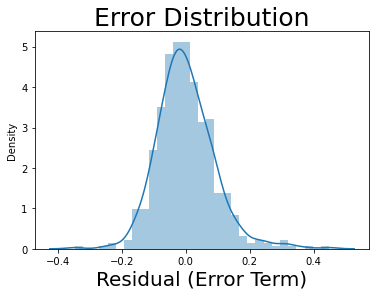

In [144]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

 From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

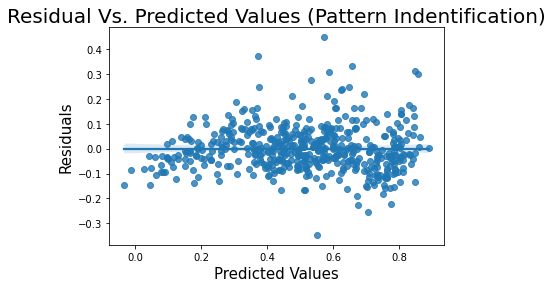

In [145]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [146]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 1.850516267998259e-15



From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

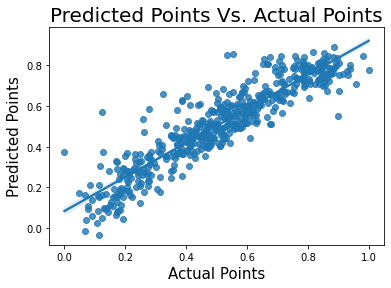

In [147]:
# now lets check predicted values and actual values
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, we can say that residuals are equal distributed across predicted value.
This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.

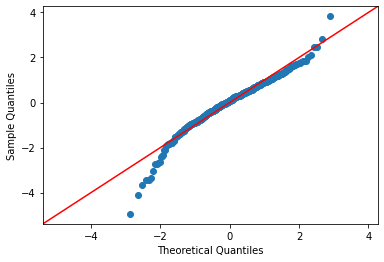

In [148]:
res = lr_model.resid
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

In [149]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,windspeed,4.66
1,temp,3.88
2,winter,2.77
3,spring,2.76
4,year,2.07
5,summer,1.91
6,nov,1.81
7,jan,1.65
8,Misty,1.56
9,dec,1.46


Evaluating Correlation Co-efficients of Predictors Impacting Target Variable (Individually)

In [151]:
corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
temp,0.65
year,0.59
spring,-0.55
jan,-0.38
windspeed,-0.25
Light_snowrain,-0.23
sep,0.20
Misty,-0.17
dec,-0.14
summer,0.14


Lets Predict on test data

In [152]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,4,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,20,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.798722,0.334206,0.303382,27,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,10,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.149627,0.537414,0.569029,2,0,...,0,0,1,0,0,0,0,0,1,0
404,1,0,1,0.256524,0.240105,0.478167,0.326196,0.438104,9,0,...,0,0,1,0,0,0,0,1,0,0
198,0,0,1,0.856704,0.820207,0.592119,0.372990,0.510354,18,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,1,0.774672,0.733207,0.744409,0.276724,0.553728,21,0,...,0,0,0,1,0,0,1,0,0,0
512,1,1,0,0.814131,0.787883,0.624068,0.331536,0.692706,28,0,...,0,0,0,0,0,0,0,0,1,0
200,0,0,1,0.883701,0.876552,0.663471,0.153738,0.495858,20,0,...,0,0,0,0,1,0,0,0,0,0


In [153]:
y_test = df_test.pop('cnt')

In [154]:
X_test = df_test

In [155]:

#Filtering Test Input (& Reserving Required Features Only)
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [156]:
y_test_pred = lr_model.predict(X_test_new)

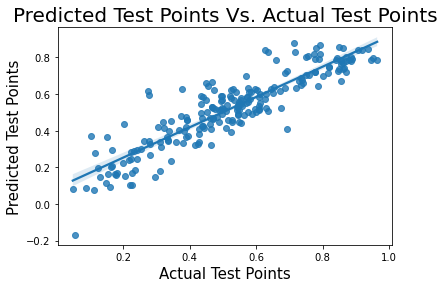

In [157]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

In [158]:
#Generating R-Square
r2_score(y_test, y_test_pred)

0.8119338251392612

# Conclusion

We carried out the analysis using the techique of elimation of variables with OLS method. Our training model resulted in a R square value of almost 81 percent which is acceptable. Which concludes that, almost 81 percent of the data of cnt present in the training set is explained by our independent variables.

The final relationship between demand and predictors is as follows.

cnt = 0.2379+0.235*year+(-0.0907)*holiday+0.4248*temp+(-0.1591)*windspeed+(-0.0434)*dec+(-0.0522)*jan+(-0.0393)*nov+0.0823*sep+(-0.2926)*Light_snowrain+(-0.0787)*Misty+(-0.0597)*spring+0.0496*summer+0.0988*winter



Our test data set has returned a R Square of 81 percent, which states 81 percent of the data present in test set is explained by the model we have created. This is a descent result to achieve.
